Seleciona todas as informações do banco de dados

In [2]:
import sqlite3

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Executar a consulta para selecionar todos os dados da tabela weather_data
c.execute("SELECT * FROM weather_data")

# Obter todos os resultados da consulta
rows = c.fetchall()

# Exibir os dados recuperados
if rows:
    for row in rows:
        print(f"ID: {row[0]}, Cidade: {row[1]}, Temperatura: {row[2]}°C, Humidade: {row[3]}%, Descrição: {row[4]}, Data/Hora: {row[5]}")
else:
    print("Nenhum dado encontrado na tabela weather_data.")

# Fechar a conexão
conn.close()


ID: 1, Cidade: Batatais, Temperatura: 22.81°C, Humidade: 32%, Descrição: clear sky, Data/Hora: 2024-09-14 22:36:50
ID: 2, Cidade: Batatais, Temperatura: 22.81°C, Humidade: 32%, Descrição: clear sky, Data/Hora: 2024-09-14 22:37:14


Análise de Tendência de Temperatura

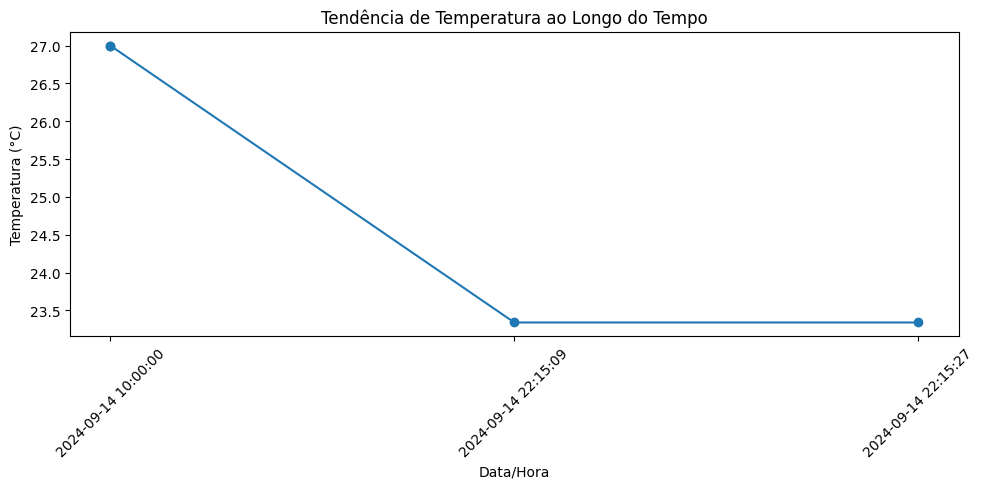

In [20]:
import sqlite3
import matplotlib.pyplot as plt

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Consultar dados de temperatura
c.execute("SELECT datetime, temperature FROM weather_data ORDER BY datetime")
rows = c.fetchall()

# Fechar a conexão
conn.close()

# Preparar dados para o gráfico
dates = [row[0] for row in rows]
temperatures = [row[1] for row in rows]

# Plotar gráfico
plt.figure(figsize=(10, 5))
plt.plot(dates, temperatures, marker='o')
plt.xlabel('Data/Hora')
plt.ylabel('Temperatura (°C)')
plt.title('Tendência de Temperatura ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Análise de Umidade

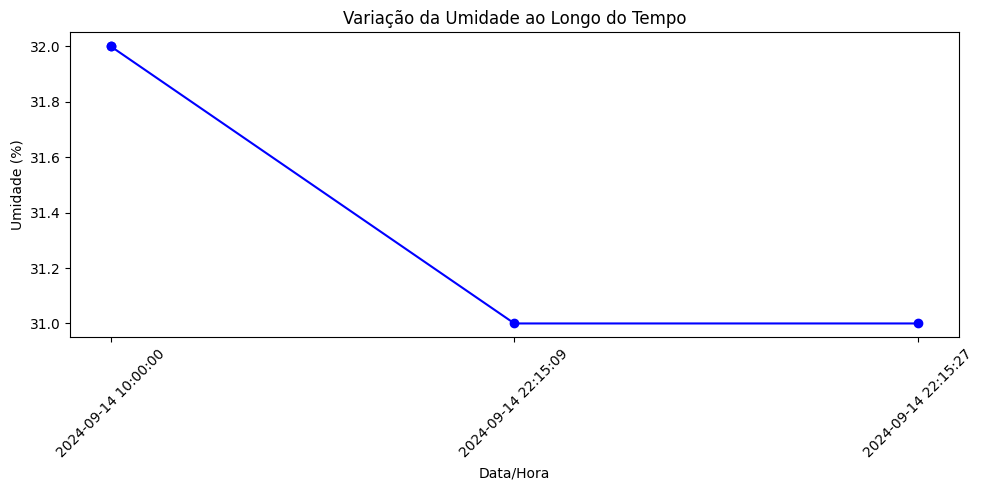

In [21]:
import sqlite3
import matplotlib.pyplot as plt

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Consultar dados de umidade
c.execute("SELECT datetime, humidity FROM weather_data ORDER BY datetime")
rows = c.fetchall()

# Fechar a conexão
conn.close()

# Preparar dados para o gráfico
dates = [row[0] for row in rows]
humidities = [row[1] for row in rows]

# Plotar gráfico
plt.figure(figsize=(10, 5))
plt.plot(dates, humidities, marker='o', color='blue')
plt.xlabel('Data/Hora')
plt.ylabel('Umidade (%)')
plt.title('Variação da Umidade ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Análise de Descrição do Tempo

In [22]:
import sqlite3
from collections import Counter

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Consultar dados de descrição
c.execute("SELECT description FROM weather_data")
rows = c.fetchall()

# Fechar a conexão
conn.close()

# Contar frequências das descrições
descriptions = [row[0] for row in rows]
description_counts = Counter(descriptions)

# Exibir resultados
for description, count in description_counts.items():
    print(f"{description}: {count} vezes")


clear sky: 4 vezes


Análise Estatística

In [23]:
import sqlite3
import numpy as np

# Conectar ao banco de dados
conn = sqlite3.connect('weather_forecast.db')
c = conn.cursor()

# Consultar dados de temperatura e umidade
c.execute("SELECT temperature, humidity FROM weather_data")
rows = c.fetchall()

# Fechar a conexão
conn.close()

# Preparar dados para análise
temperatures = [row[0] for row in rows]
humidities = [row[1] for row in rows]

# Calcular estatísticas
temperature_mean = np.mean(temperatures)
temperature_median = np.median(temperatures)
temperature_std = np.std(temperatures)

humidity_mean = np.mean(humidities)
humidity_median = np.median(humidities)
humidity_std = np.std(humidities)

# Exibir estatísticas
print(f"Temperatura - Média: {temperature_mean:.2f}°C, Mediana: {temperature_median:.2f}°C, Desvio Padrão: {temperature_std:.2f}")
print(f"Umidade - Média: {humidity_mean:.2f}%, Mediana: {humidity_median:.2f}%, Desvio Padrão: {humidity_std:.2f}")


Temperatura - Média: 25.17°C, Mediana: 25.17°C, Desvio Padrão: 1.83
Umidade - Média: 31.50%, Mediana: 31.50%, Desvio Padrão: 0.50
